`wu_increasing_lin_tau_zero_pase_zero_noise_E.ipynb`

> data: `wu_10000_zero-noise_zero-spikes_integer-taus-wrapped_some-small-spikes.bz2`

> trying an older model

##### imports

In [1]:
import tensorflow as tf, numpy as np, pandas as pd, matplotlib.pyplot as plt, glob, sys, io

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FuncFormatter

from plot_styles import set_plotstyles
set_plotstyles()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format = 'retina'

/Users/andrew/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### import and preprocess data

In [2]:
#import data
data_df = pd.read_csv('../generating_data/data/wu_10000_zero-noise_zero-spikes_integer-taus-wrapped_some-small-spikes.bz2', compression = 'bz2')

# split random 80% / 20%
training_data_df = data_df.sample(frac = 0.8)
testing_data_df = data_df.loc[~data_df.index.isin(training_data_df.index)]

# separate input features from output
X_training = training_data_df.drop('tau', axis = 1).values
Y_training = training_data_df[['tau']].values

X_testing = testing_data_df.drop('tau', axis = 1).values
Y_testing = testing_data_df[['tau']].values

# setup data scalers
X_scaler = MinMaxScaler(feature_range = (0,1))
Y_scaler = MinMaxScaler(feature_range = (0,1))

# scale data
X_scaled_training = X_scaler.fit_transform(X_training)
Y_scaled_training = Y_scaler.fit_transform(Y_training)

X_scaled_testing = X_scaler.transform(X_testing)
Y_scaled_testing = Y_scaler.transform(Y_testing)

In [3]:
# setup layer & NN parameters
number_of_inputs = X_scaled_training.shape[1]
number_of_outputs = Y_scaled_training.shape[1]

#### Train NN round 1

In [14]:
layer_1_nodes = 115
layer_2_nodes = 280
layer_3_nodes = 450
layer_4_nodes = 290
layer_5_nodes = 205
layer_6_nodes = 105
layer_7_nodes = 50

learning_rate = 0.0015
training_epochs = 1500

In [8]:
# one random serial number per NN graph
# - add letters to end for repeated runs
# - only run this cell once!
log_random_serial_number = '{}'.format(np.random.randint(10000,99999))
# log_random_serial_number = 81230
log_random_serial_number

'81230'

In [15]:
def log_dir(log_random_serial_number):
    master_log_path = '../logs/'
    log_num = len(glob.glob(master_log_path + log_random_serial_number + '*'))
    
    direc = master_log_path + log_random_serial_number
    if log_num > 0:
        # assumes less than 26 runs per graph
        direc += chr(ord('@') + log_num)
    return direc

In [18]:
tf.reset_default_graph()

# Input Layer
with tf.variable_scope('input'):
    X  = tf.placeholder(tf.float32, shape = (None, number_of_inputs))

# Layer 1
with tf.variable_scope('layer_1'):

    biases = tf.get_variable(name = "biases1",
                             shape = [layer_1_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights1",
                              shape  = [number_of_inputs, layer_1_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_1_output = tf.nn.relu(tf.matmul(X, weights) + biases)

# Layer 2
with tf.variable_scope('layer_2'):

    biases = tf.get_variable(name = "biases2",
                             shape = [layer_2_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights2",
                              shape  = [layer_1_nodes, layer_2_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_2_output = tf.nn.relu(tf.matmul(layer_1_output, weights) + biases)

# Layer 3
with tf.variable_scope('layer_3'):

    biases = tf.get_variable(name = "biases3",
                             shape = [layer_3_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights3",
                              shape  = [layer_2_nodes, layer_3_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_3_output = tf.nn.relu(tf.matmul(layer_2_output, weights) + biases)

# Layer 4
with tf.variable_scope('layer_4'):

    biases = tf.get_variable(name = "biases4",
                             shape = [layer_4_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights4",
                              shape  = [layer_3_nodes, layer_4_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_4_output = tf.nn.relu(tf.matmul(layer_3_output, weights) + biases)


# Layer 5
with tf.variable_scope('layer_5'):

    biases = tf.get_variable(name = "biases5",
                             shape = [layer_5_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights5",
                              shape  = [layer_4_nodes, layer_5_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_5_output = tf.nn.relu(tf.matmul(layer_4_output, weights) + biases)

# Layer 6
with tf.variable_scope('layer_6'):

    biases = tf.get_variable(name = "biases6",
                             shape = [layer_6_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights6",
                              shape  = [layer_5_nodes, layer_6_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_6_output = tf.nn.relu(tf.matmul(layer_5_output, weights) + biases)

# Layer 7
with tf.variable_scope('layer_7'):

    biases = tf.get_variable(name = "biases7",
                             shape = [layer_7_nodes],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights7",
                              shape  = [layer_6_nodes, layer_7_nodes],
                         initializer = tf.contrib.layers.xavier_initializer())


    layer_7_output = tf.nn.relu(tf.matmul(layer_6_output, weights) + biases)




# Output layer

with tf.variable_scope('output'):

    biases = tf.get_variable(name = "biases_out",
                             shape = [number_of_outputs],
                             initializer = tf.zeros_initializer())

    weights = tf.get_variable(name = "weights_out",
                              shape  = [layer_7_nodes, number_of_outputs],
                         initializer = tf.contrib.layers.xavier_initializer())


    prediction = tf.nn.relu(tf.matmul(layer_7_output, weights) + biases)

with tf.variable_scope('cost'):

    Y = tf.placeholder(tf.float32, shape = (None, 1))
    cost = tf.reduce_mean(tf.squared_difference(prediction, Y))


with tf.variable_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate, epsilon=1e-08).minimize(cost)

with tf.variable_scope('logging'):
    tf.summary.scalar('current_cost', cost)
    summary = tf.summary.merge_all()
    


In [19]:
saver = tf.train.Saver()
log_direc = log_dir(str(81230))
print(log_direc)

../logs/81230A


##### Training round 5

INFO:tensorflow:Restoring parameters from ../logs/81230/model/trained_model.ckpt-1450
 epoch:    0 testing_cost: 0.0105432021

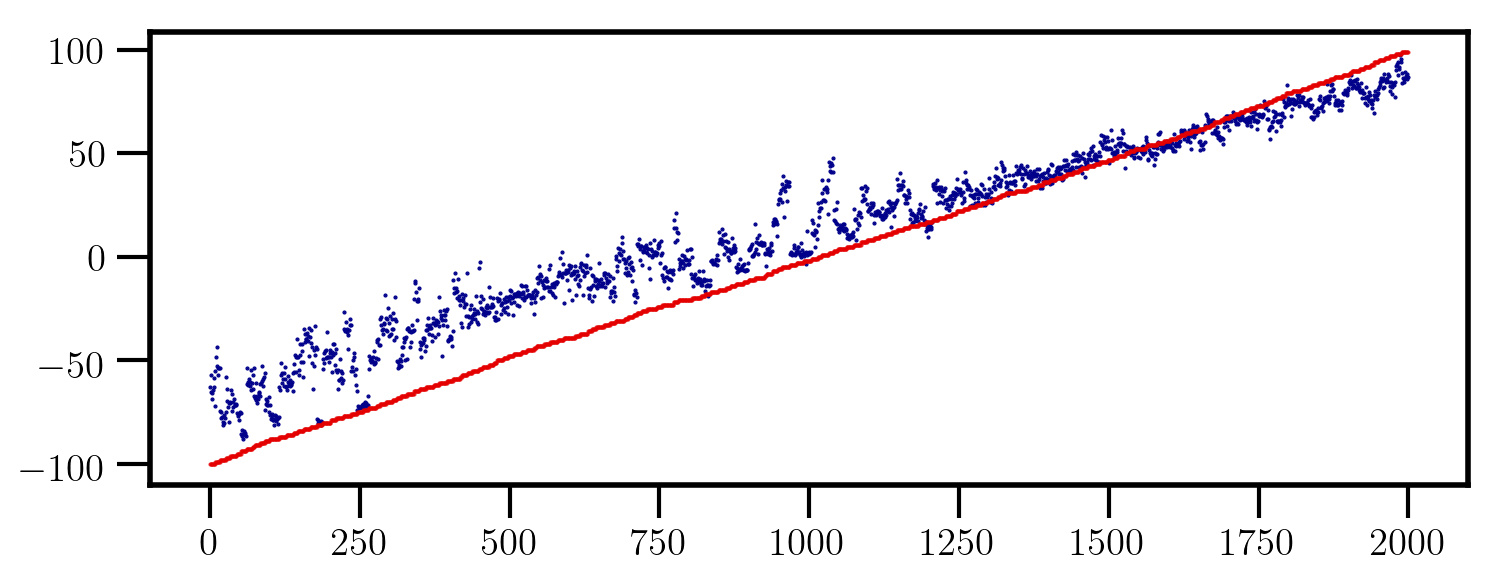

 epoch:   50 testing_cost: 0.1042723060

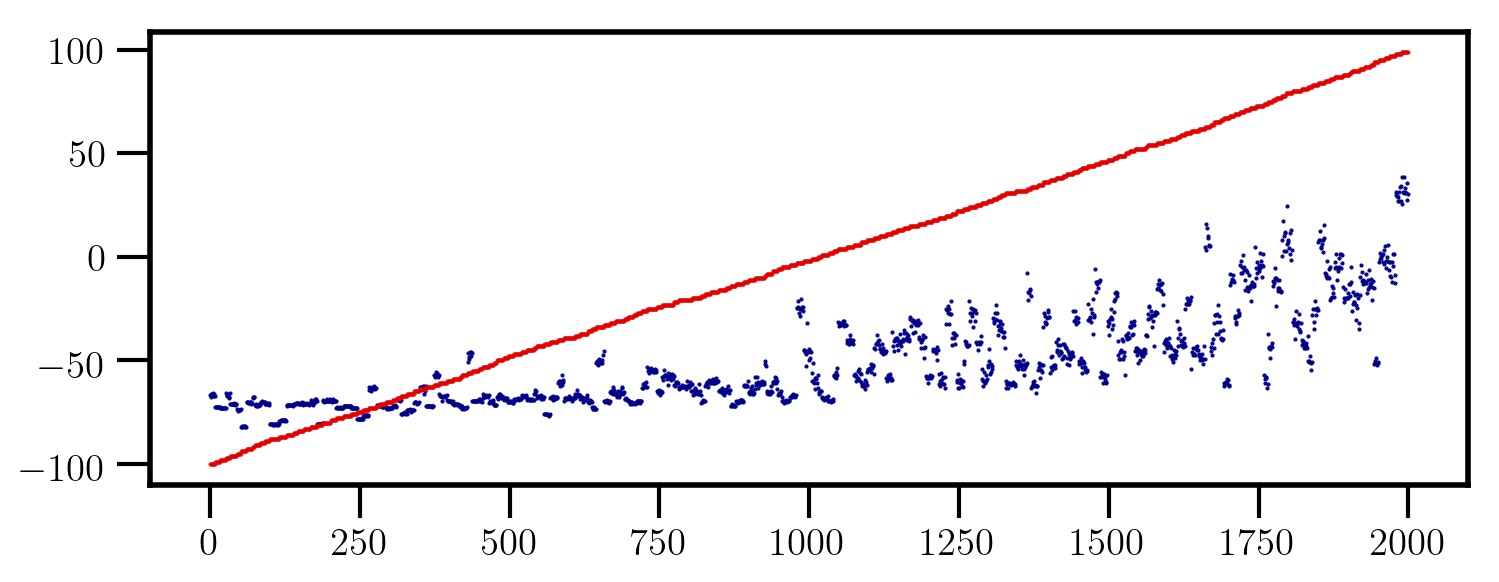

 epoch:  100 testing_cost: 0.0060585062

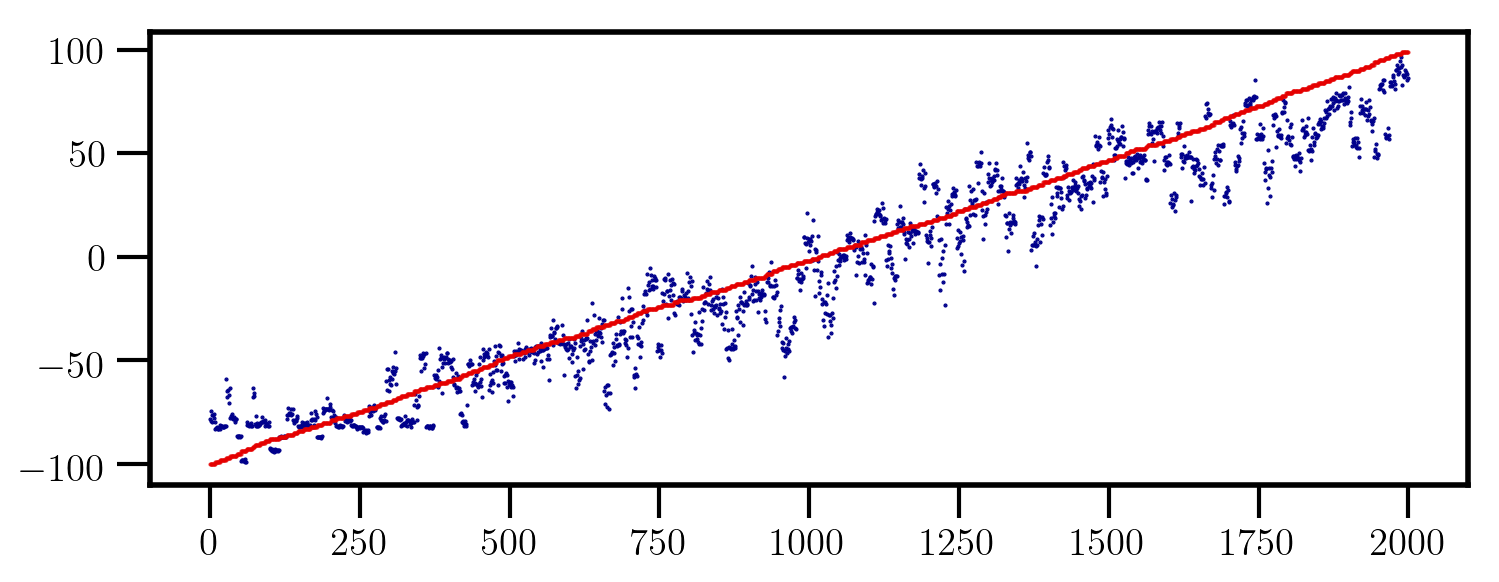

 epoch:  150 testing_cost: 0.0008726789

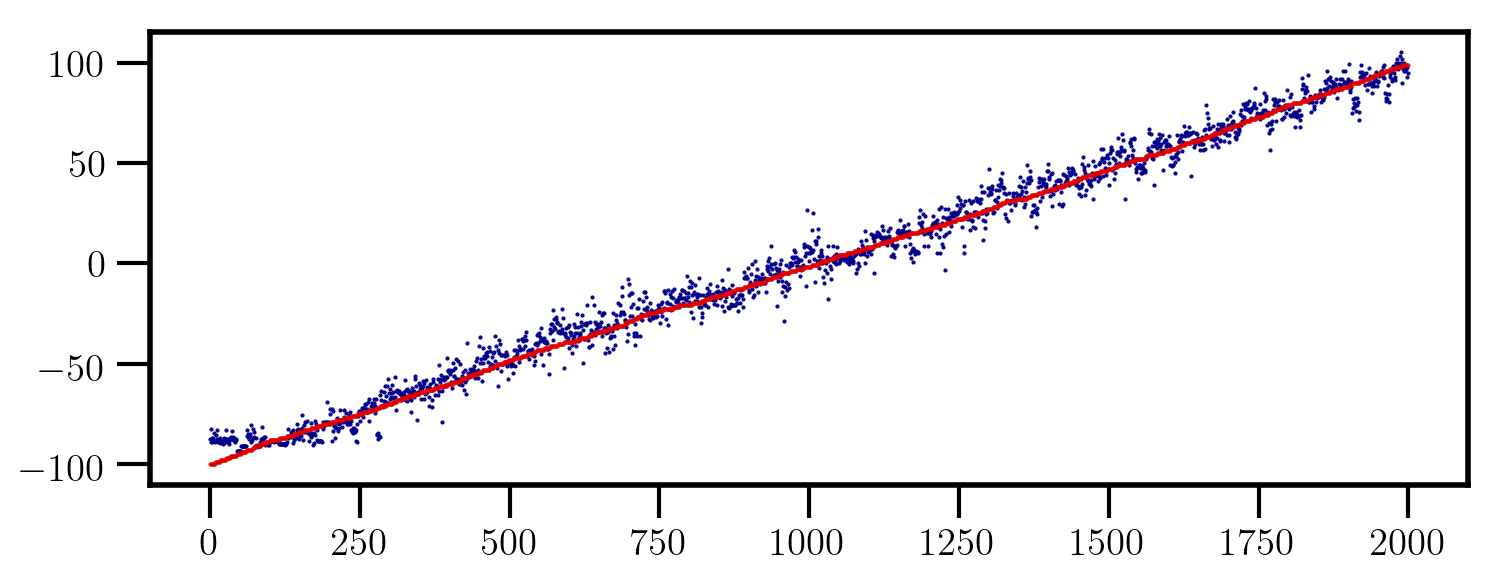

 epoch:  200 testing_cost: 0.0004327418

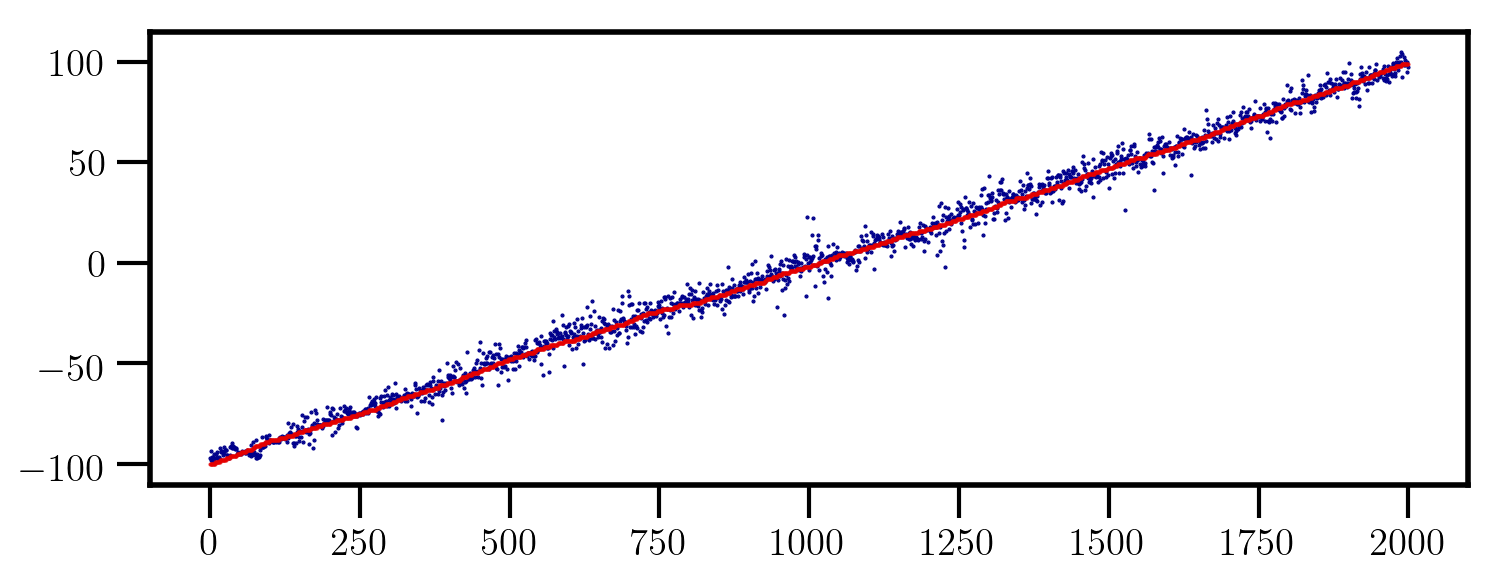

 epoch:  250 testing_cost: 0.0003291900

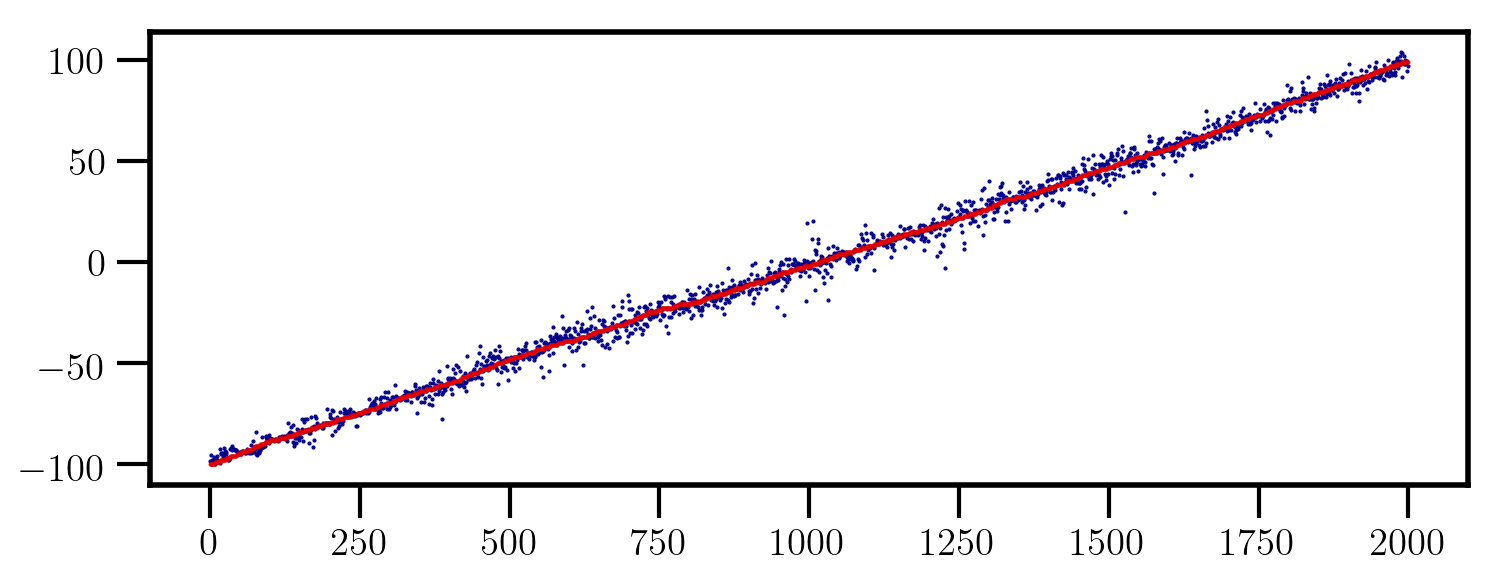

 epoch:  300 testing_cost: 0.0002852780

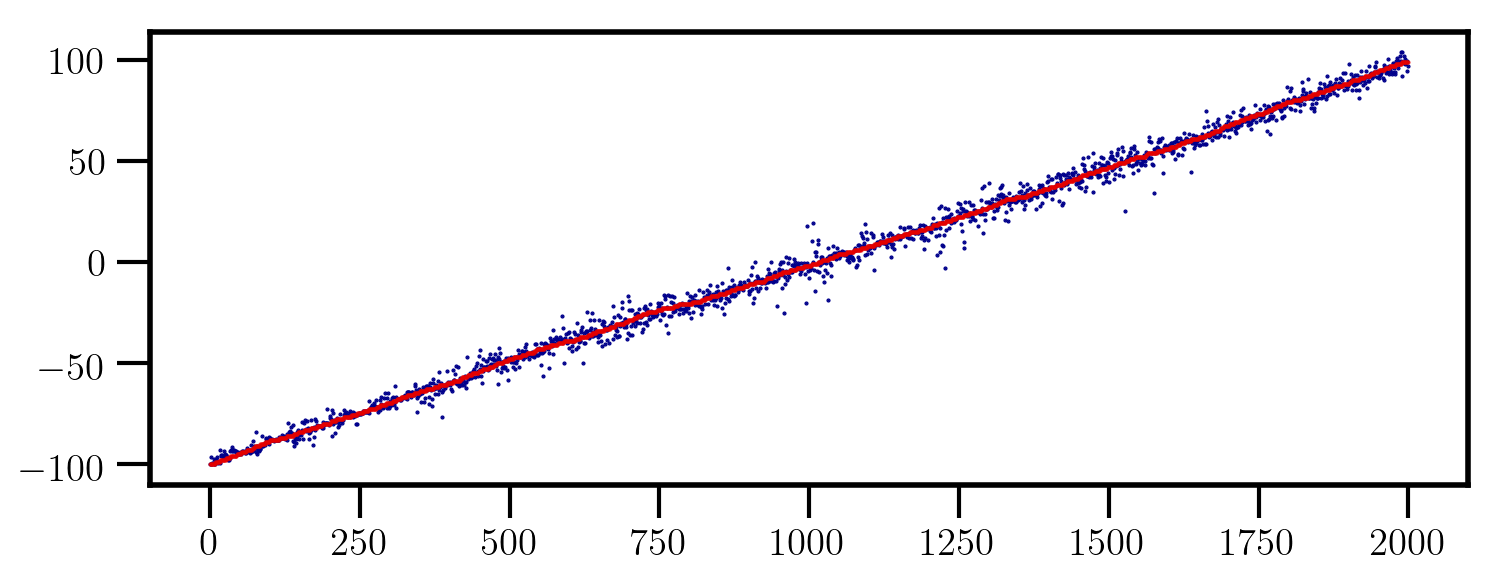

 epoch:  350 testing_cost: 0.0002535659

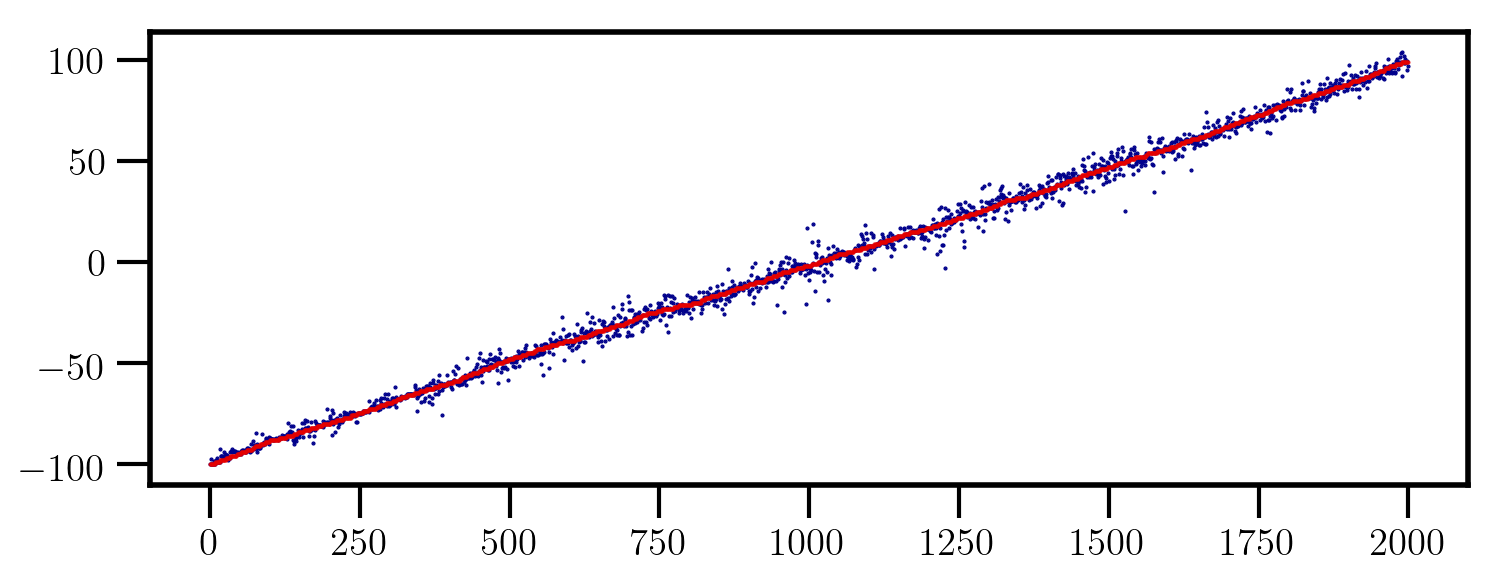

 epoch:  400 testing_cost: 0.0002266372

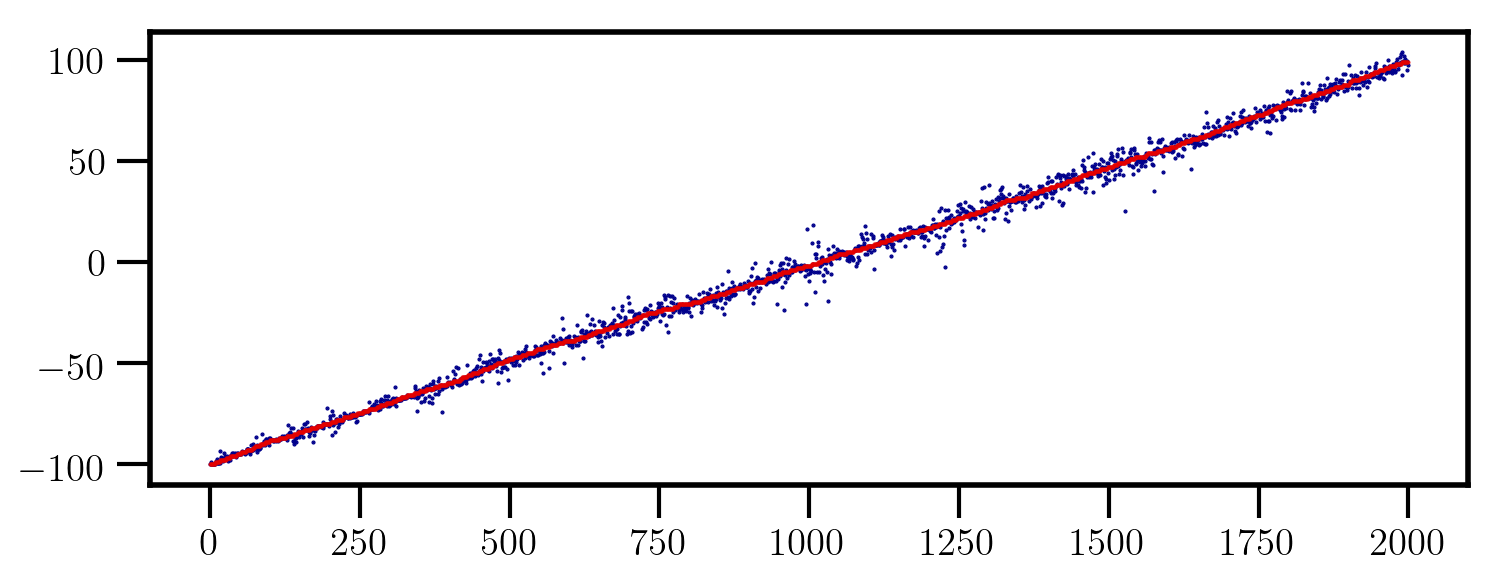

 epoch:  450 testing_cost: 0.0002016316

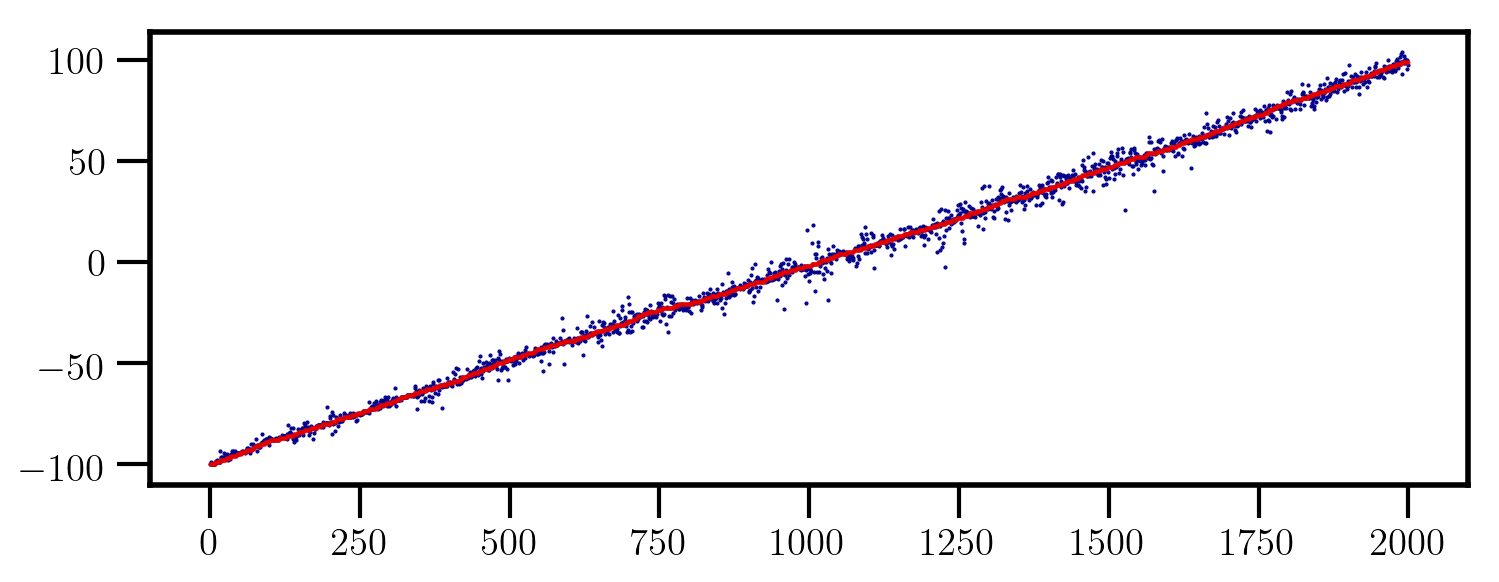

 epoch:  500 testing_cost: 0.0001784222

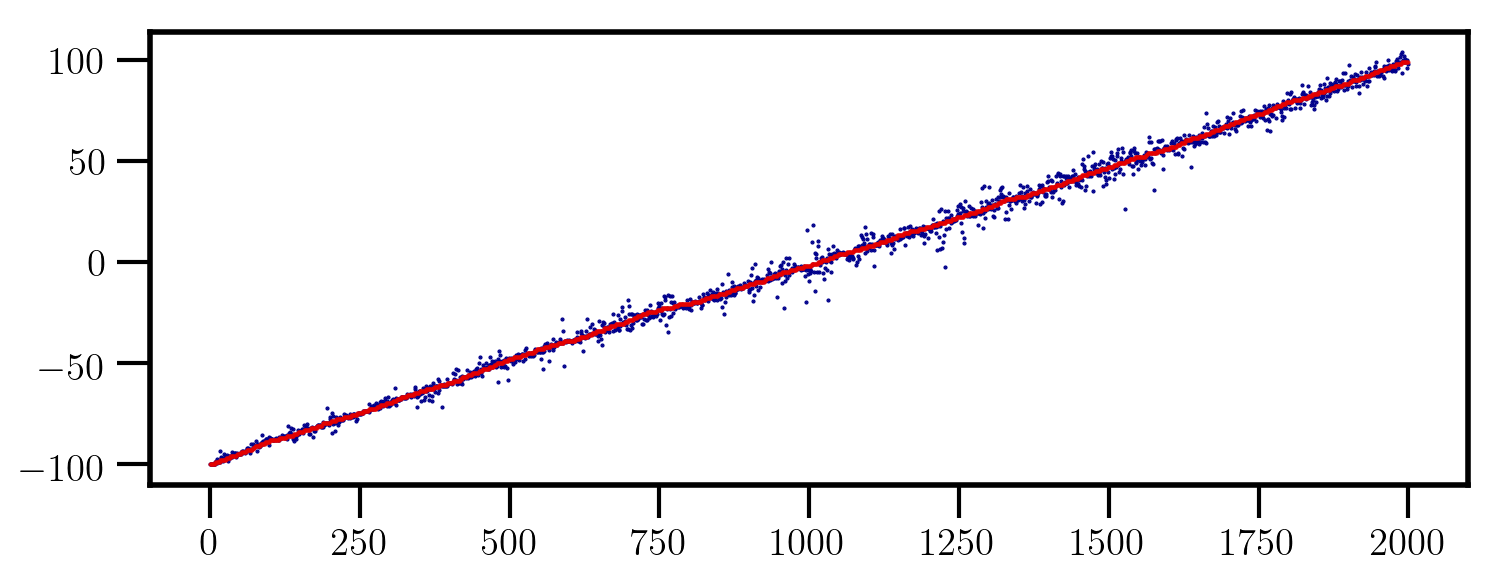

 epoch:  550 testing_cost: 0.0001575877

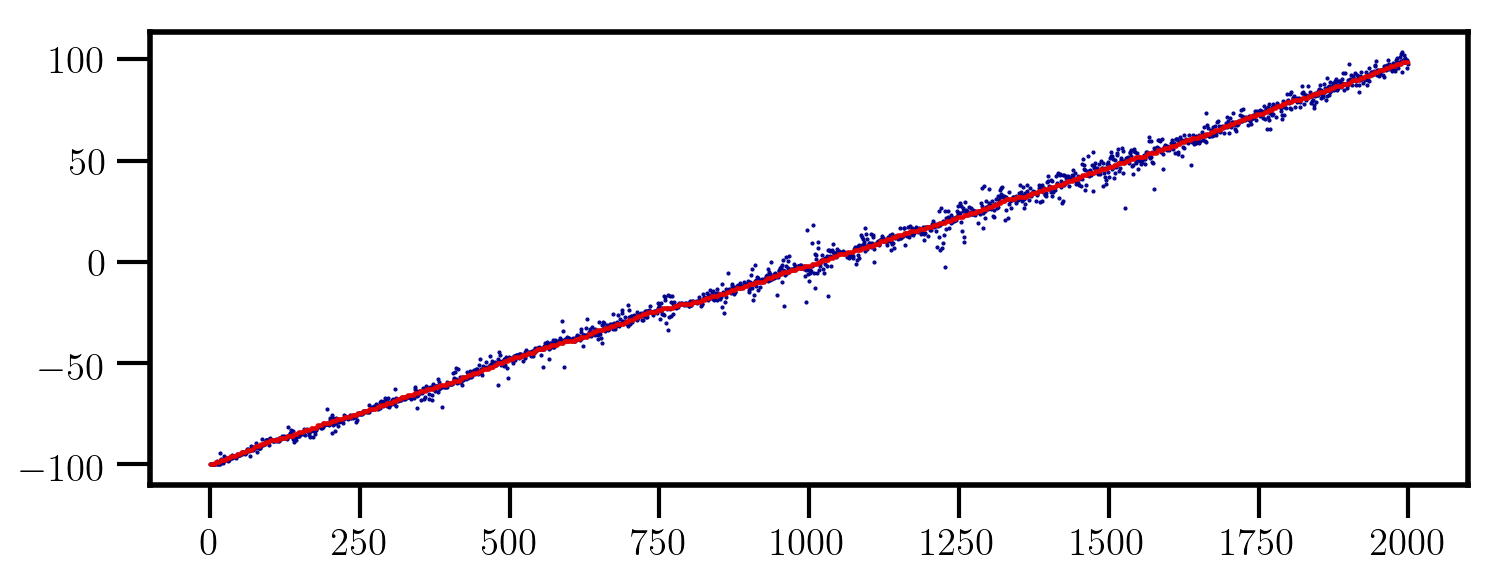

 epoch:  600 testing_cost: 0.0001311793

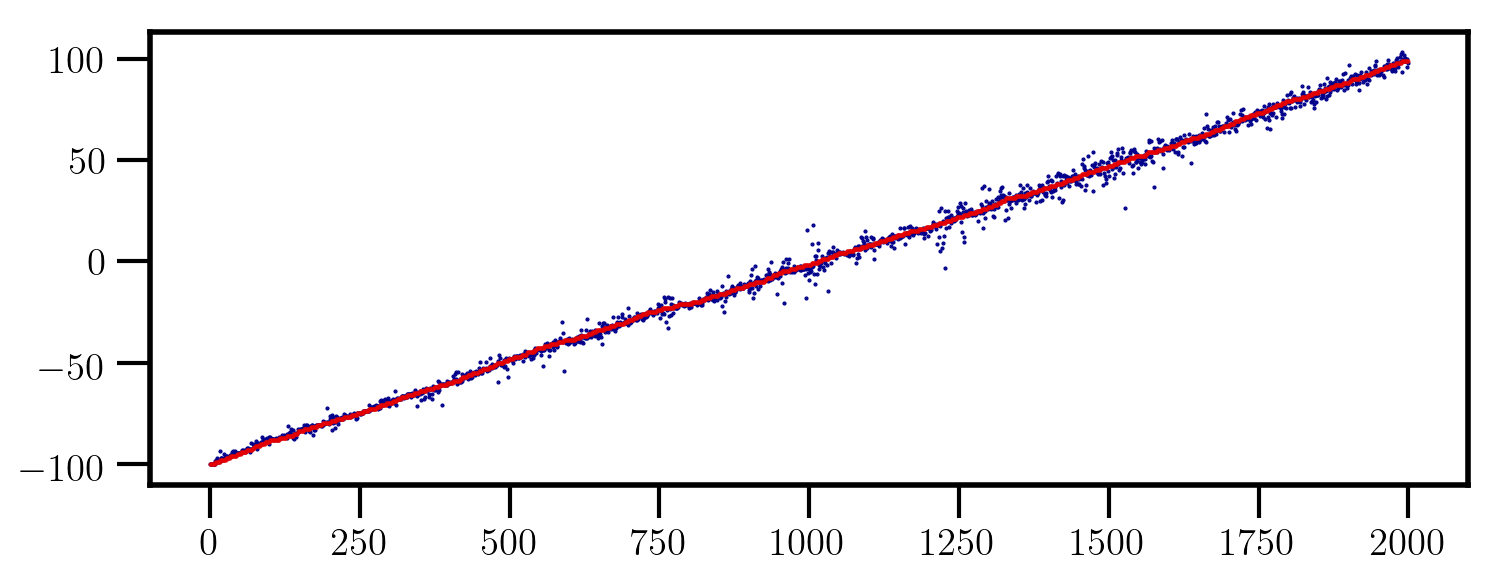

 epoch:  650 testing_cost: 0.0001121732

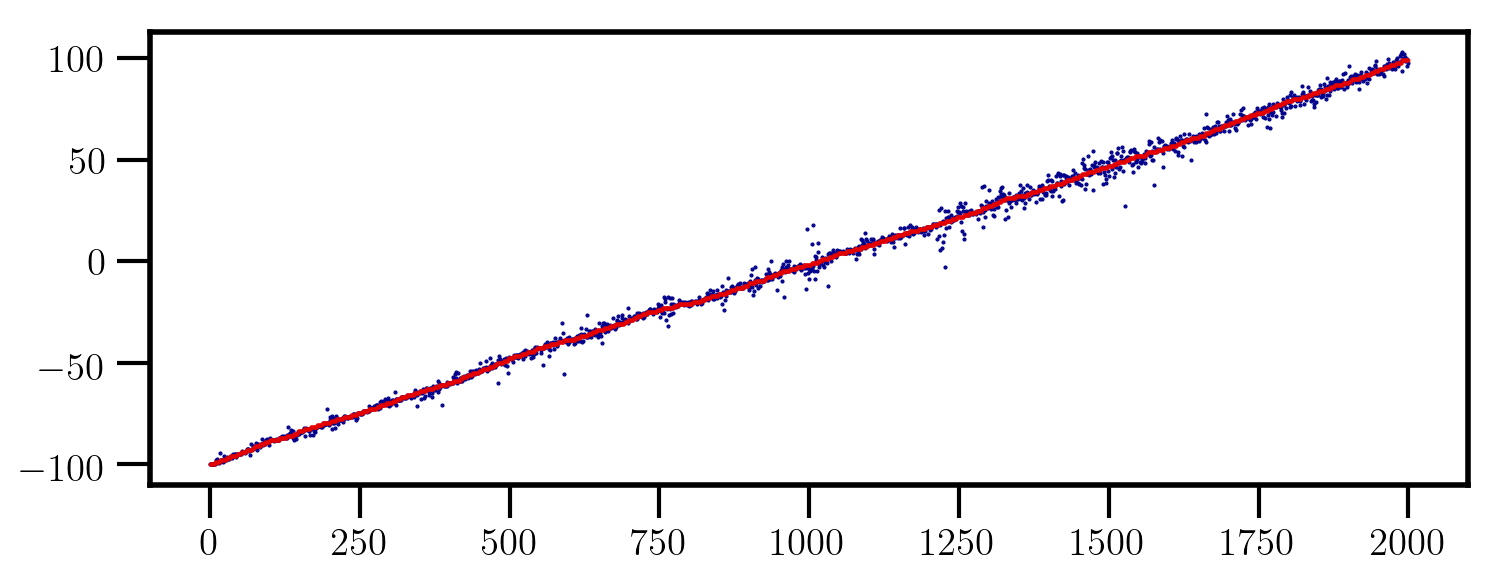

 epoch:  700 testing_cost: 0.0000958343

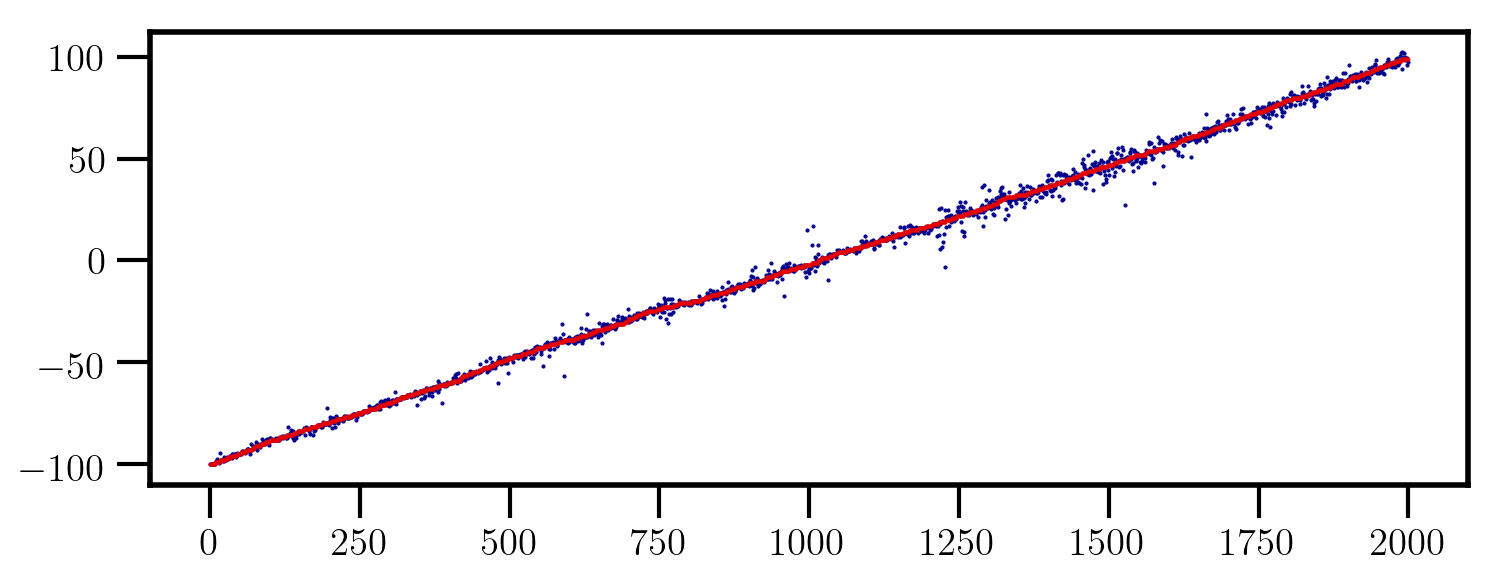

 epoch:  750 testing_cost: 0.0000841819

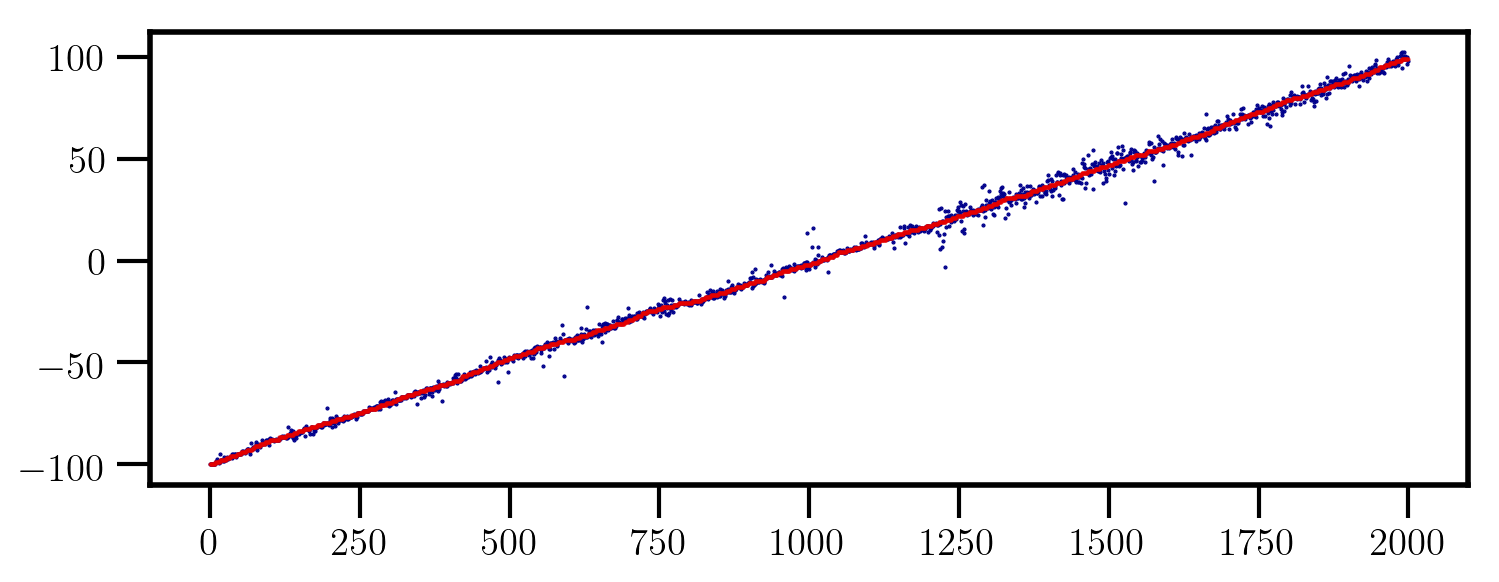

 epoch:  800 testing_cost: 0.0000775461

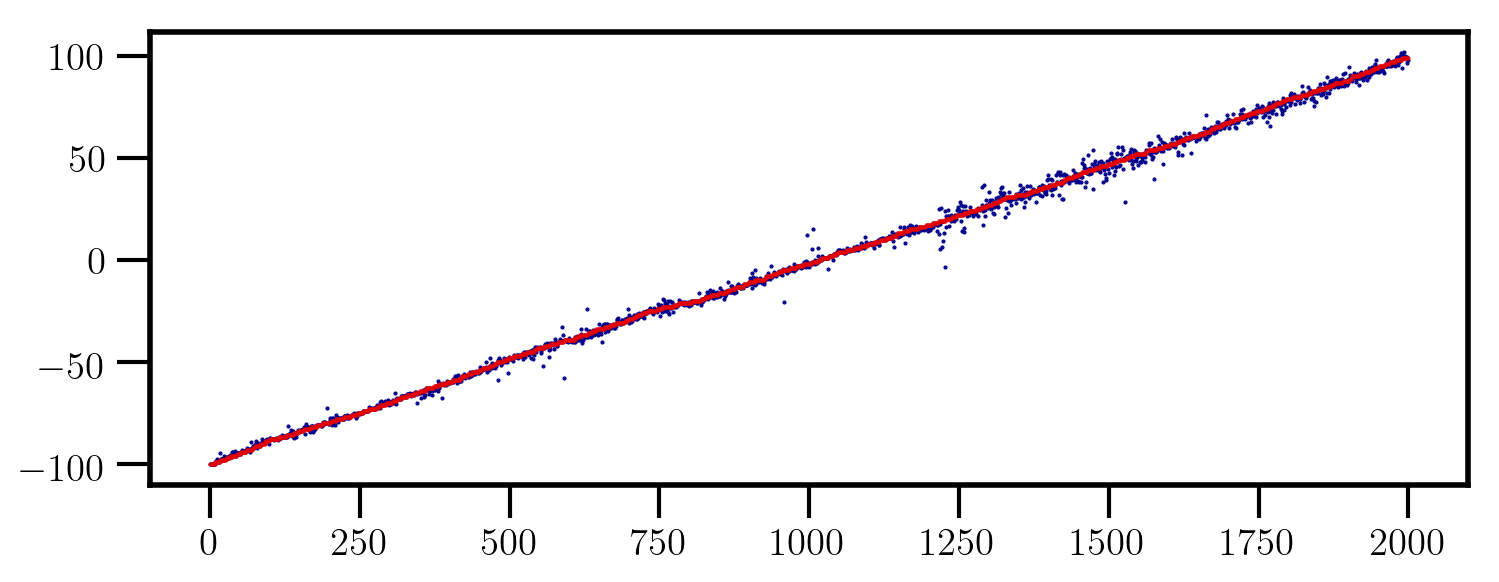

 epoch:  850 testing_cost: 0.0000710066

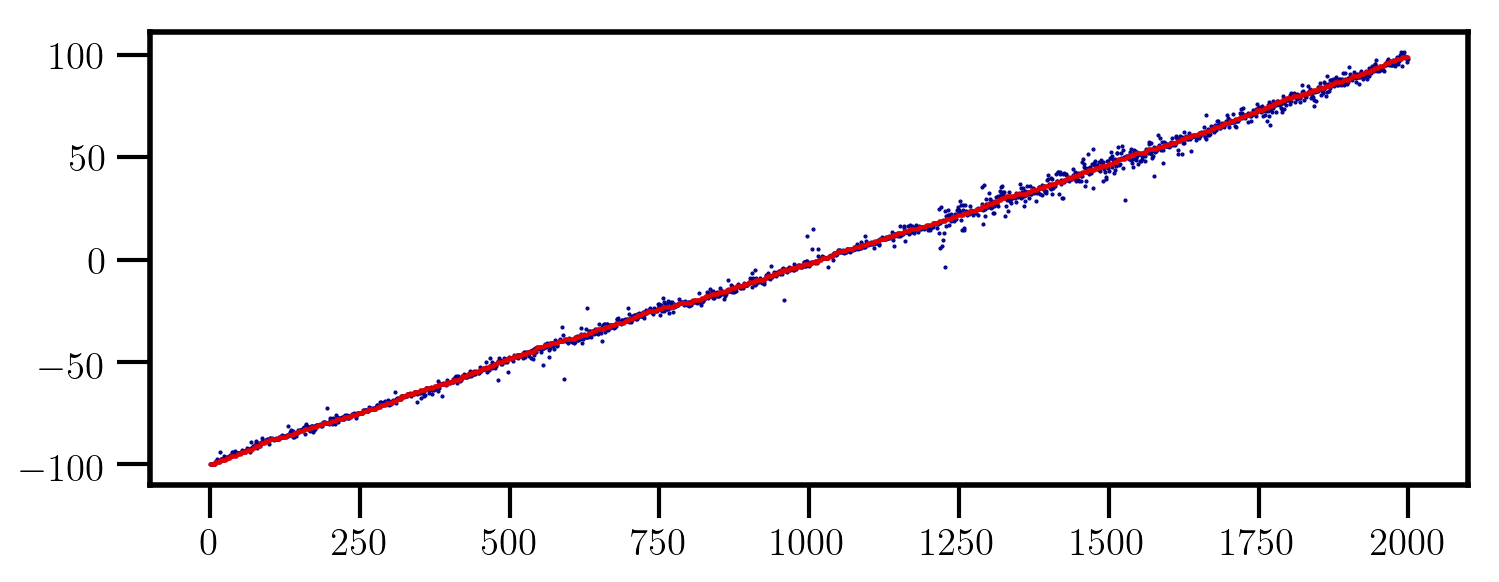

 epoch:  900 testing_cost: 0.0000644266

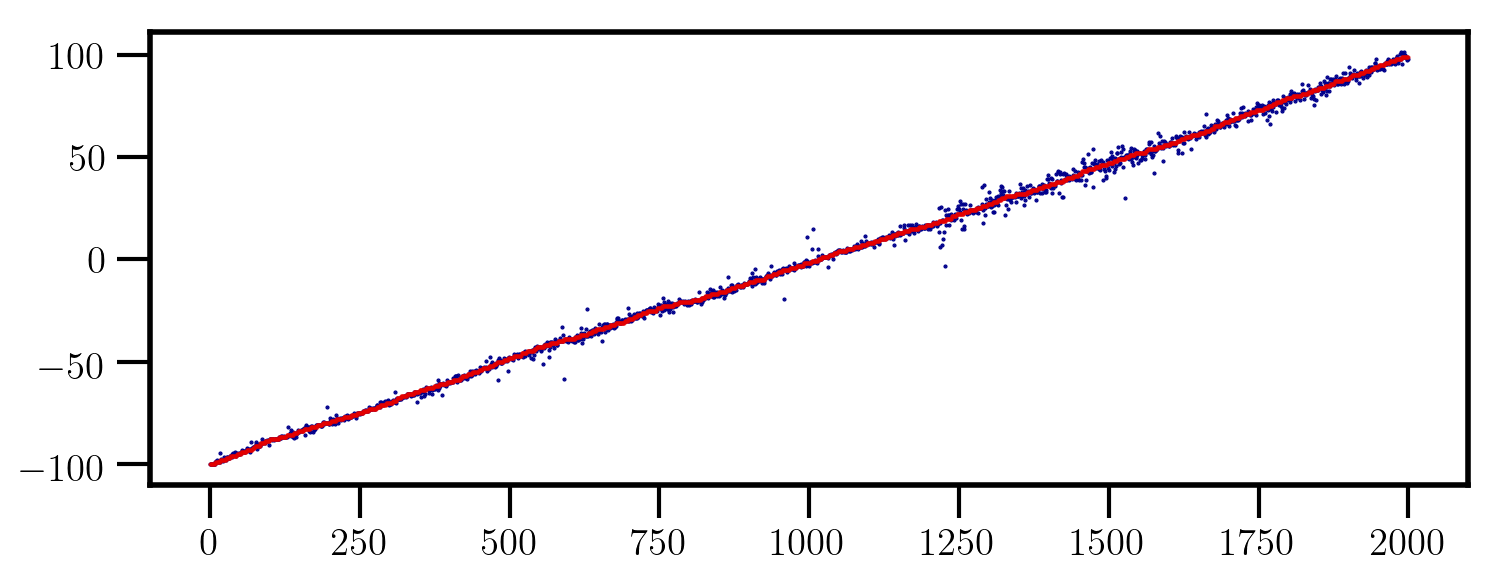

 epoch:  950 testing_cost: 0.0000591772

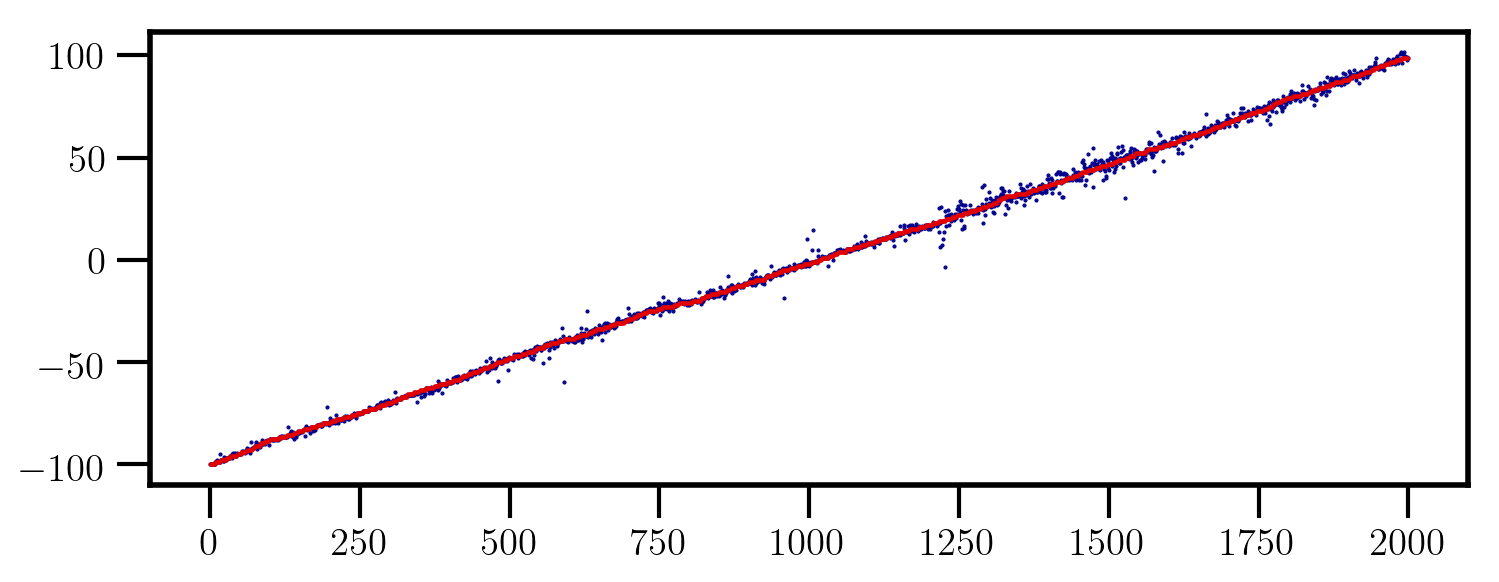

 epoch: 1000 testing_cost: 0.0000579524

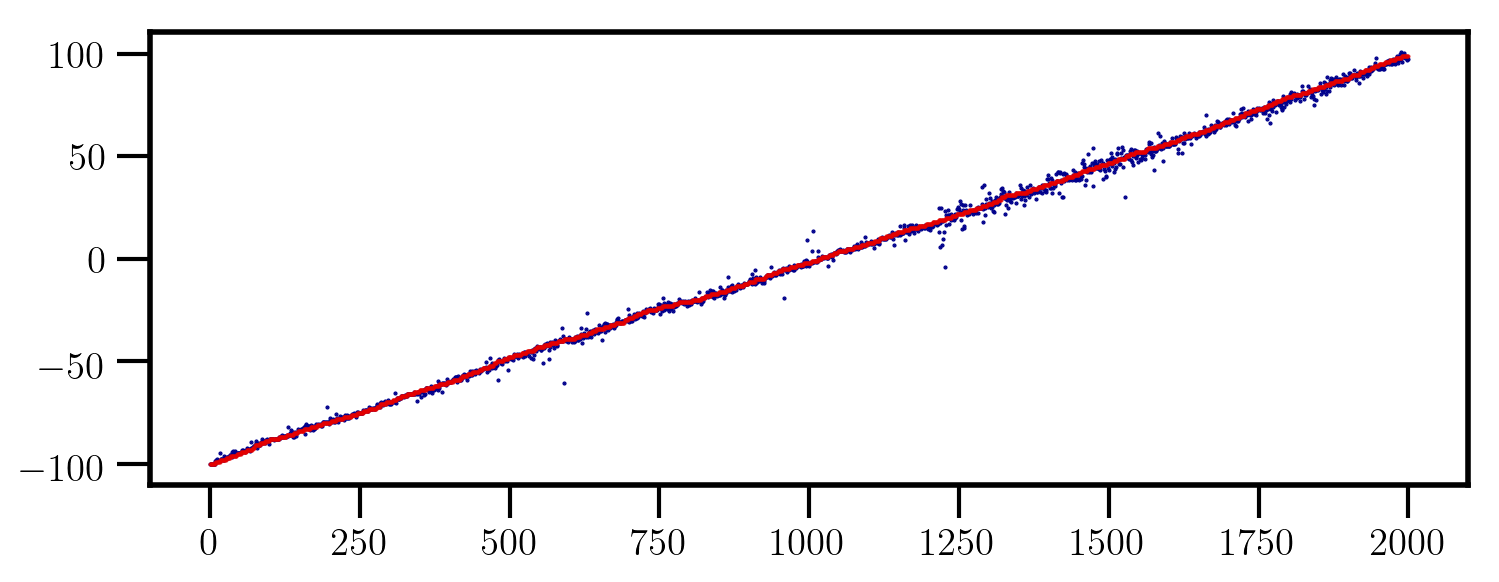

 epoch: 1050 testing_cost: 0.0000541123

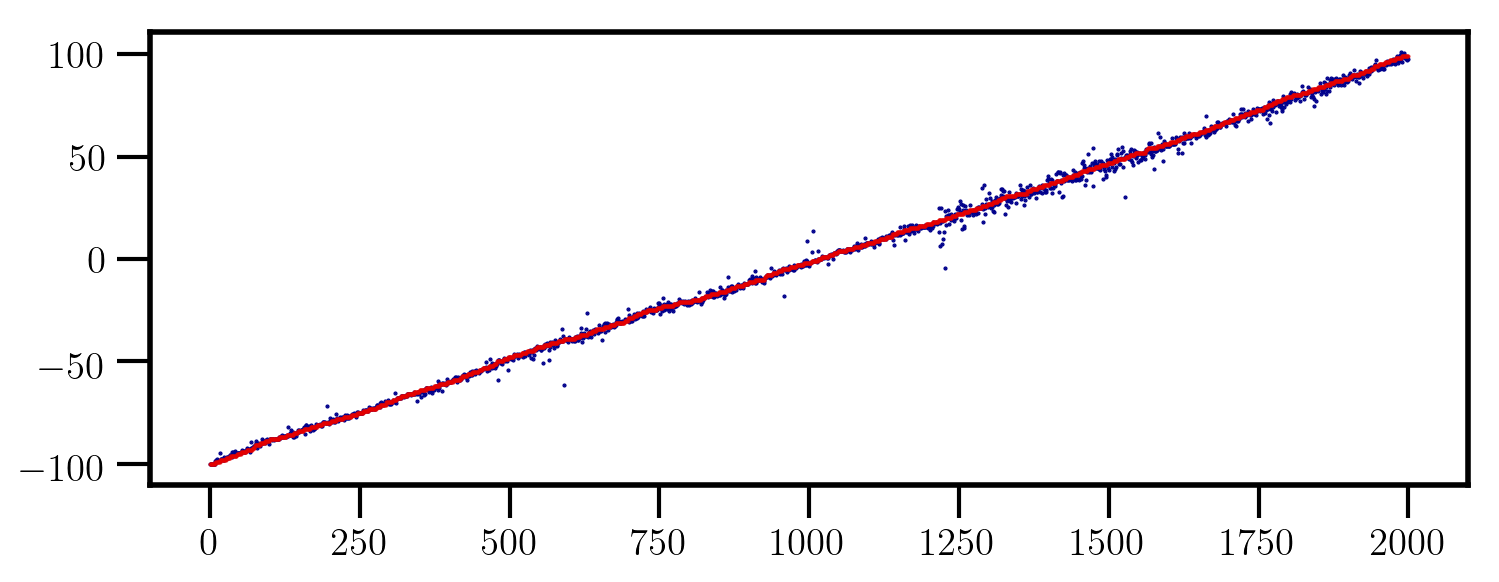

 epoch: 1100 testing_cost: 0.0000487524

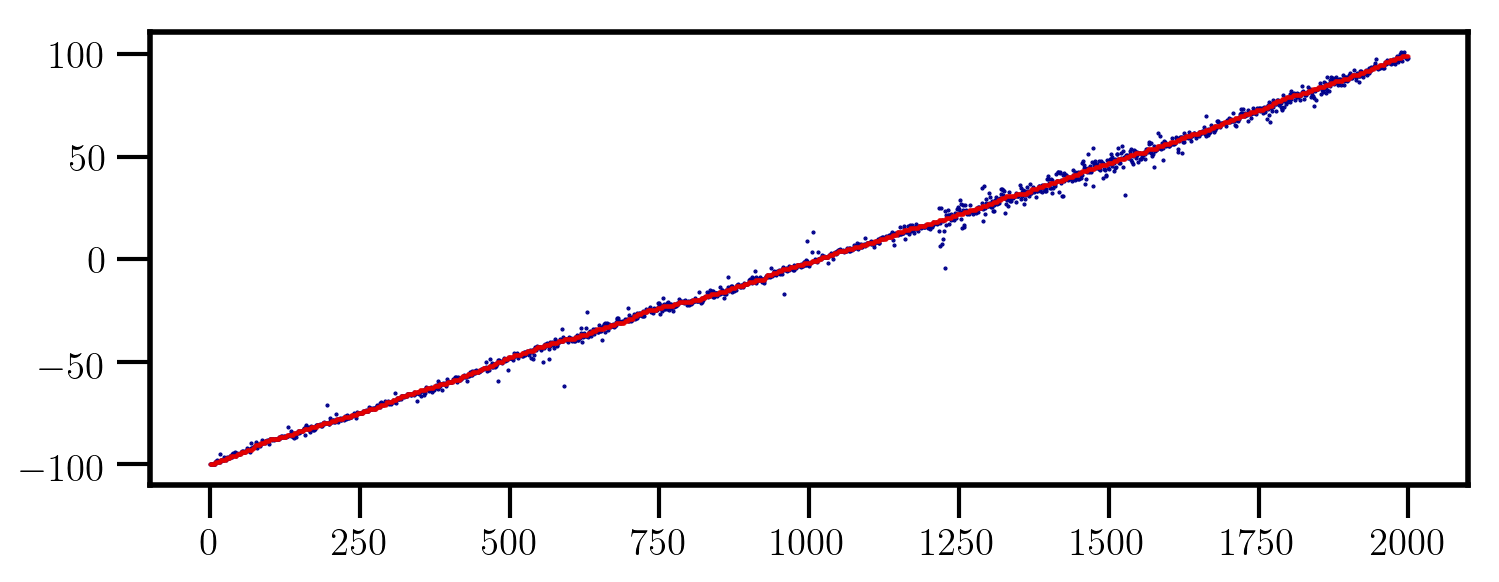

 epoch: 1150 testing_cost: 0.0000472628

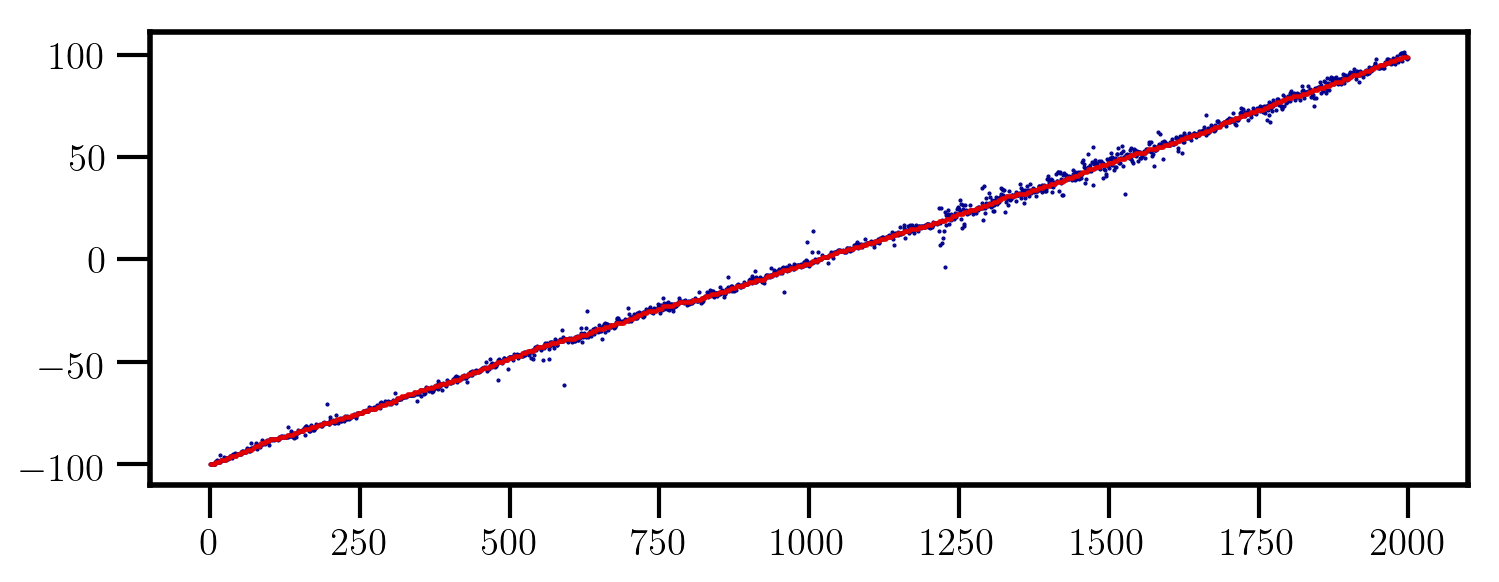

 epoch: 1200 testing_cost: 0.0000431419

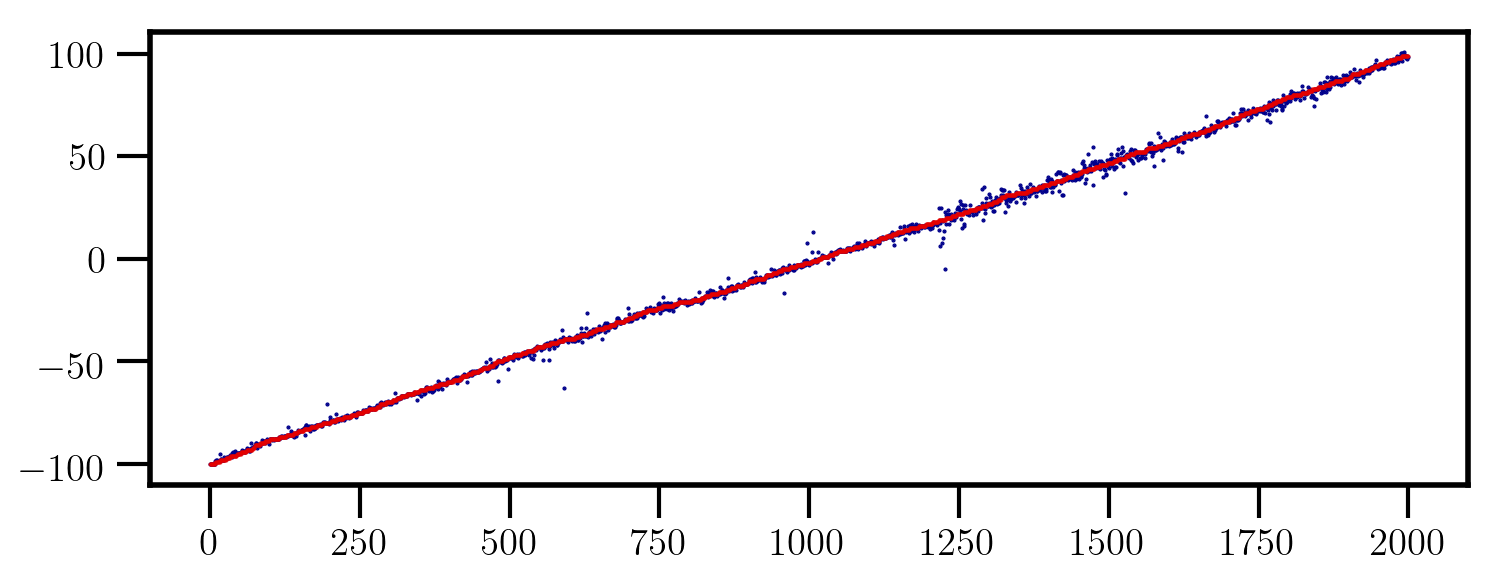

 epoch: 1250 testing_cost: 0.0000430642

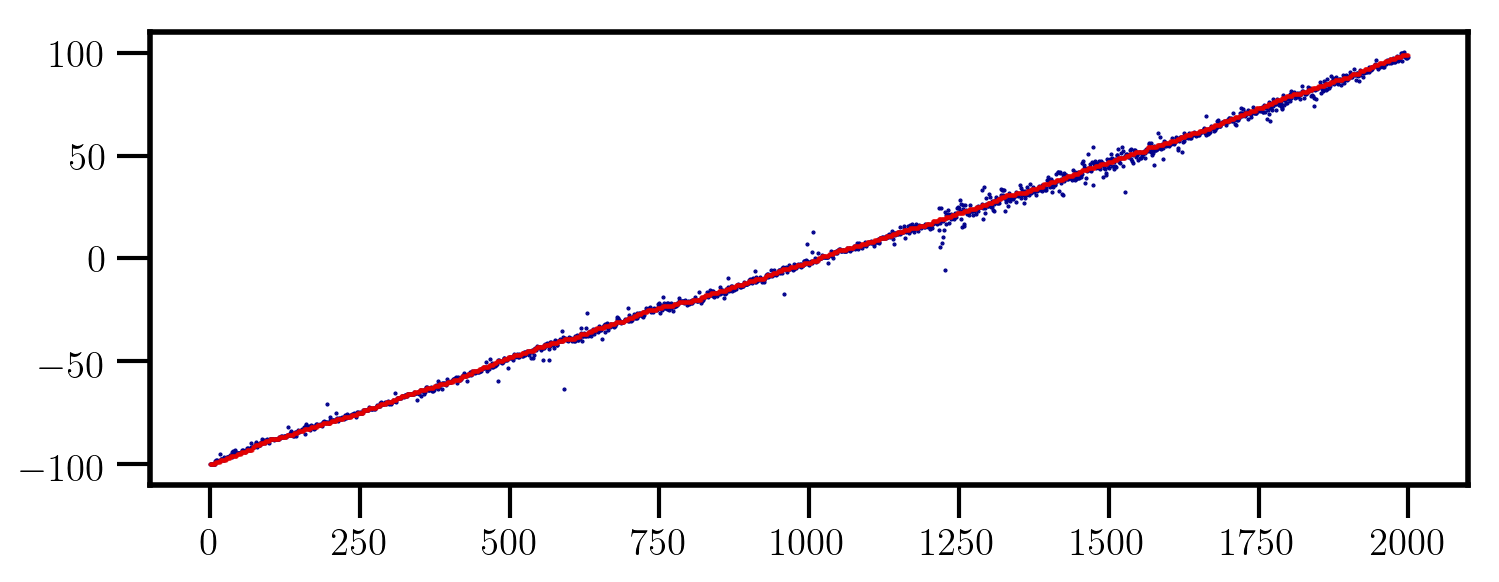

 epoch: 1300 testing_cost: 0.0000382848

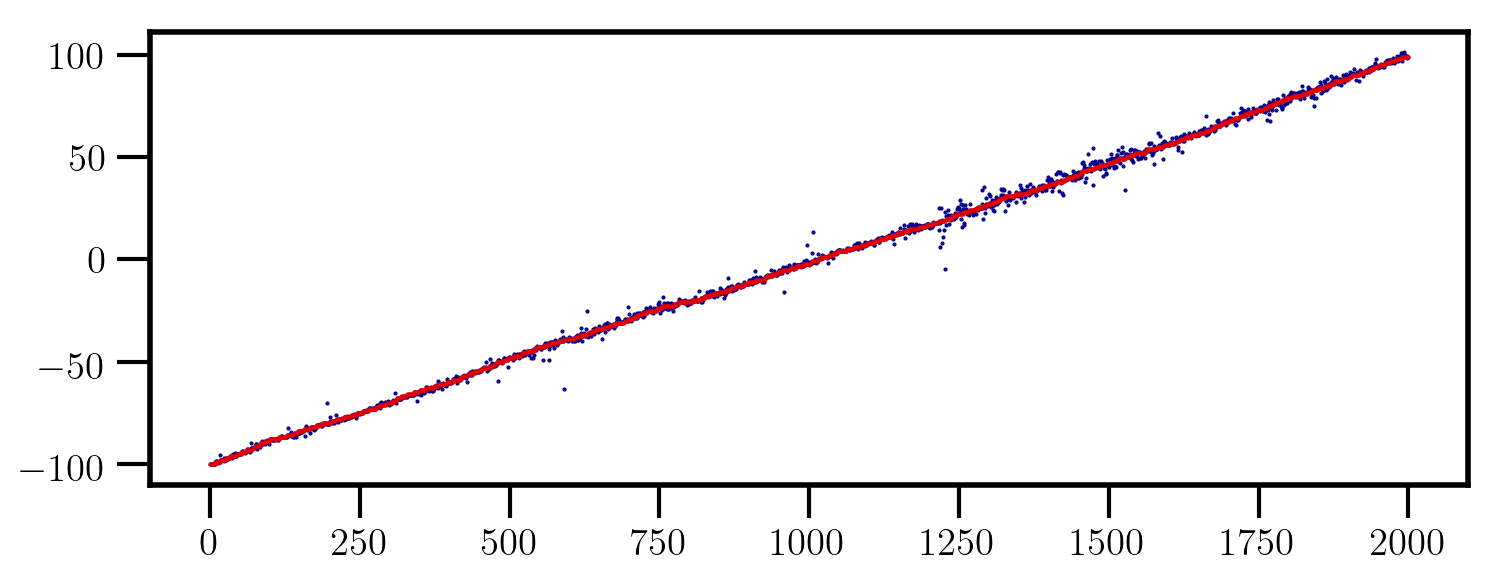

 epoch: 1350 testing_cost: 0.0000354275

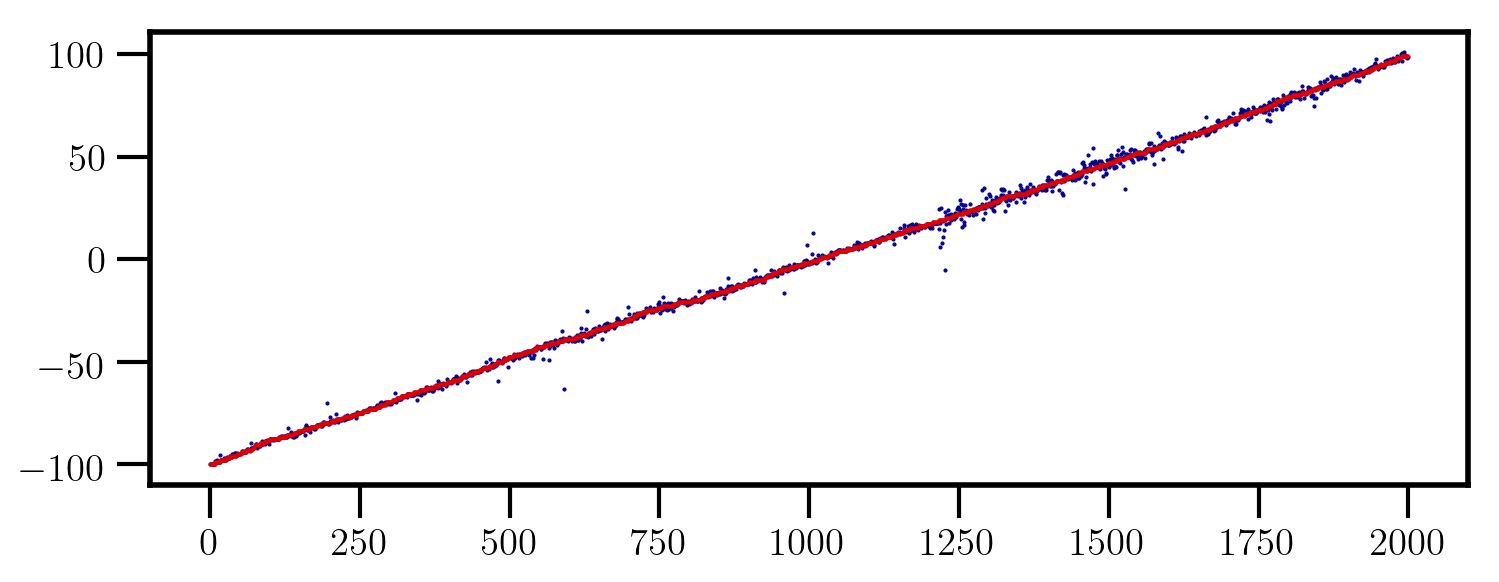

 epoch: 1400 testing_cost: 0.0000368953

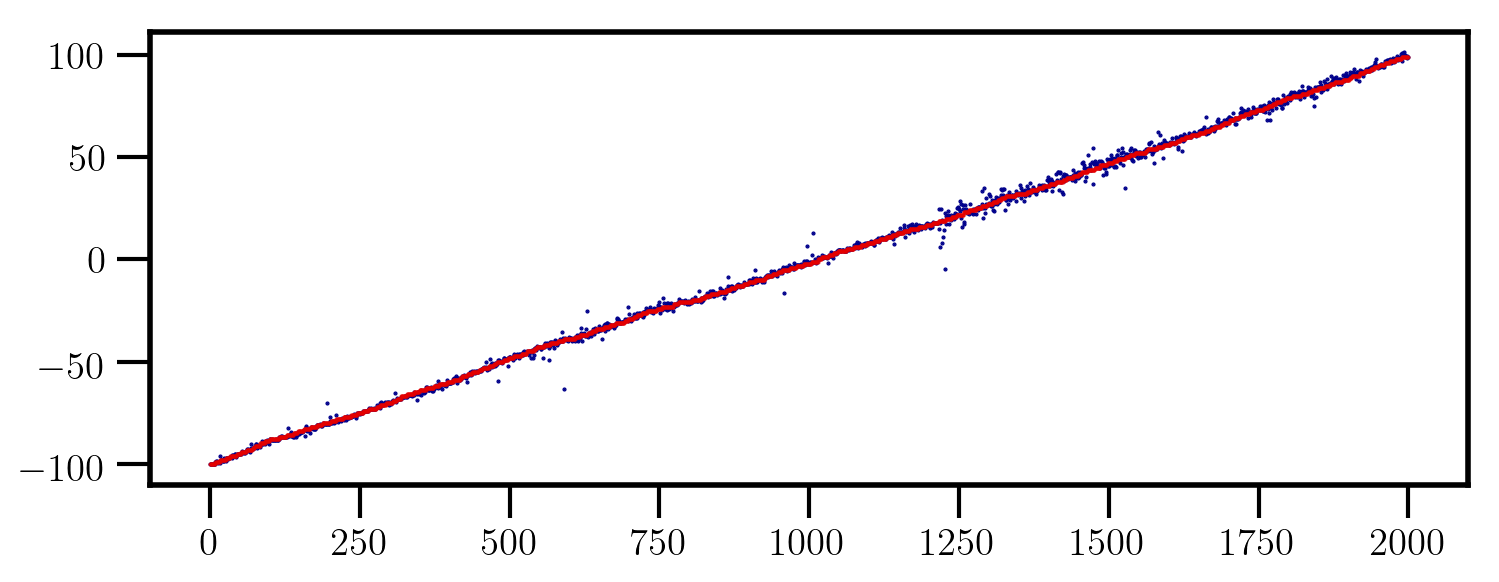

 epoch: 1450 testing_cost: 0.0000323713

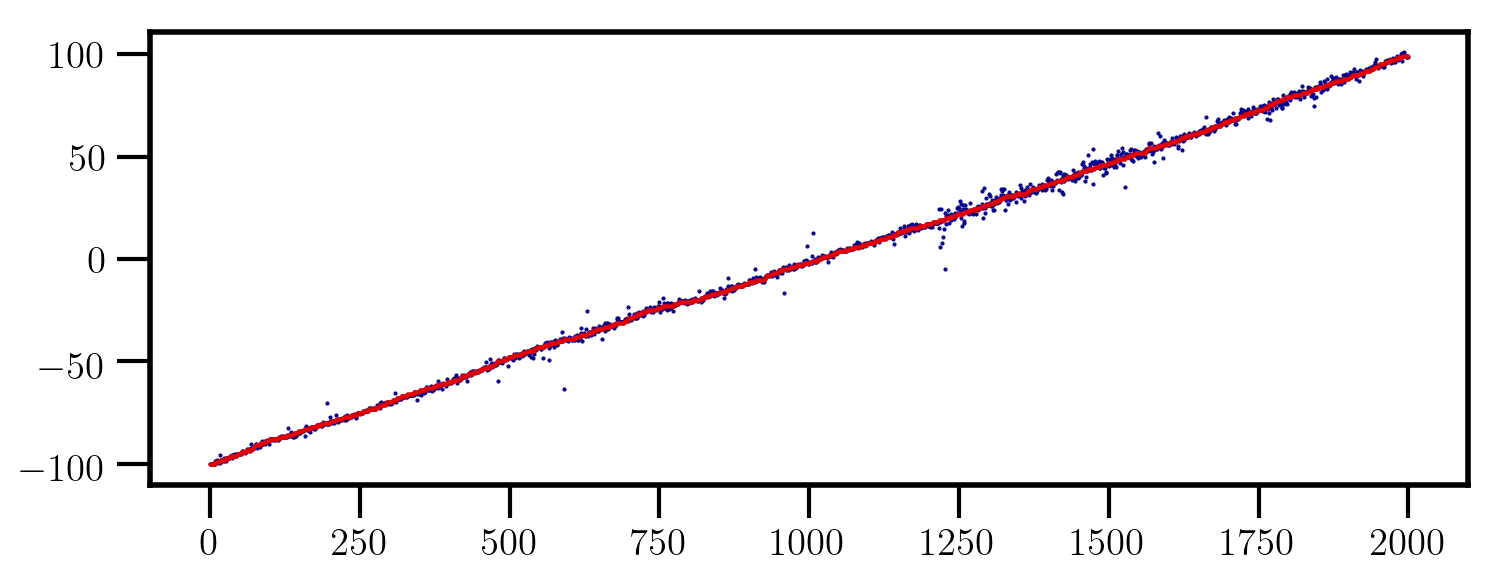

 epoch: 1499 testing_cost: 0.0000314899

In [20]:
with tf.Session() as session:

    saver.restore(session,'../logs/81230/model/trained_model.ckpt-1450')

    training_writer = tf.summary.FileWriter(log_direc + '/training', session.graph)
    testing_writer = tf.summary.FileWriter(log_direc + '/testing', session.graph)
    model_save_location = log_direc + '/model/' + 'trained_model.ckpt'


    for epoch in range(training_epochs):

        # Feed in the training data and do one stepf NN training
        session.run(optimizer,
                    feed_dict = {X: X_scaled_training, Y: Y_scaled_training})

        training_feed = {X: X_scaled_training, Y: Y_scaled_training}
        training_cost, training_summary = session.run([cost, summary],
                                                feed_dict = training_feed)

        testing_feed =  {X: X_scaled_testing, Y: Y_scaled_testing}
        testing_cost, testing_summary = session.run([cost, summary],
                                                     feed_dict = testing_feed)
        sys.stdout.write('\r epoch: {:4.0f} testing_cost: {:2.10f}'.format(epoch, training_cost))
        
        training_writer.add_summary(training_summary, epoch)
        testing_writer.add_summary(testing_summary, epoch)
        testing_writer.flush()
        training_writer.flush()
        
        if epoch % 50 == 0:
            saver.save(session, model_save_location, epoch)
            prediction_scaled = session.run(prediction, feed_dict = {X: X_scaled_testing})
            prediction_unscaled = Y_scaler.inverse_transform(prediction_scaled)
            sorting_idx = np.argsort(Y_testing.T[0])
        
            fig, ax = plt.subplots(figsize = (8.5, 3), dpi = 100)
            
            ax.plot(prediction_unscaled.T[0][sorting_idx],
                    linestyle = 'none', marker = '.', markersize = 1,
                    color = 'darkblue', label = 'Prediction')
            
            ax.plot(Y_testing.T[0][sorting_idx],
                    linestyle = 'none', marker = '.', markersize = 1, alpha = 0.75, 
                    color = '#E50000', label = 'Actual')
            plt.show()
    saver.save(session, model_save_location, epoch)

#### Test NN round 5

> Lets load up the saved model and compare the predictions it makes against our test data.

In [21]:
with tf.Session() as session:
    saver.restore(session,model_save_location + '-' + str(training_epochs - 1))
    
    prediction_scaled = session.run(prediction, feed_dict = {X: X_scaled_testing})
    
    # the predictions but in the original units
    prediction_unscaled = Y_scaler.inverse_transform(prediction_scaled)

INFO:tensorflow:Restoring parameters from ../logs/81230A/model/trained_model.ckpt-1499


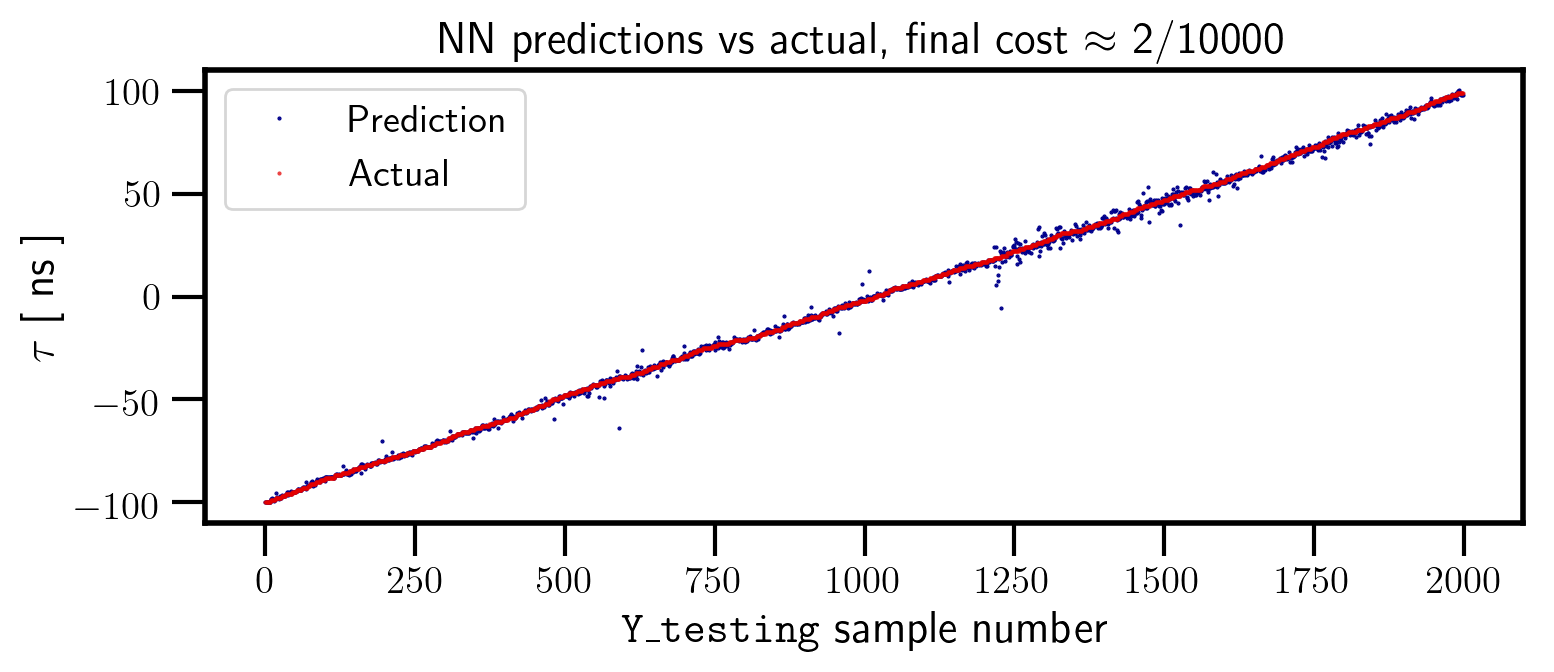

In [22]:
sorting_idx = np.argsort(Y_testing.T[0])

fig, ax = plt.subplots(figsize = (8.5, 3), dpi = 100)

ax.set_title(r'NN predictions vs actual, final cost $\approx$ 2/10000')
ax.plot(prediction_unscaled.T[0][sorting_idx],
        linestyle = 'none', marker = '.', markersize = 1,
        color = 'darkblue', label = 'Prediction')

ax.plot(Y_testing.T[0][sorting_idx],
        linestyle = 'none', marker = '.', markersize = 1, alpha = 0.75, 
        color = '#E50000', label = 'Actual')

ax.set_ylabel(r'$\tau$ [ ns ]')
ax.set_xlabel(r'$\texttt{Y\_testing}$ sample number')
ax.legend( loc = 'best')
plt.show()

In [23]:
NN_SCORE = sum((Y_scaled_testing.T[0] - prediction_scaled.T[0])**2)
NN_SCORE

0.1616487340296394

In [24]:
np.std(abs(Y_testing.T[0] - prediction_unscaled.T[0]))

1.5288683787414141

In [25]:
np.mean(abs(Y_testing.T[0] - prediction_unscaled.T[0]))

0.9291326588690275